# Let's start! Where are we?

This year we use basthon (https://notebook.basthon.fr/) as our editor interpreter for python in these data science activities. Jupyter-compatible and running in the cloud. 
If you didn't understand everything, it's quite normal, so let's start with basics.

## What is a notebook?

A notebook is a simple IDE allowing to write both source code and comments in an easy and nice manner.
A notebook is composed of blocks --called cells--, that are usually of two kinds: code cells (python code in our case) and text cells (markdown code).
As an example, what you are currently reading is written in markdown.
Despite the old fashionned way to program, the code is not executed as one block but cell by cell.
Futhermore, the current values of the global variables are always preserved after the execution.

## Is everything in the cloud?
Yes, basthon hosts for you a complete system on its cloud so you don't need any local setup.
For the purpose of these lectures we don't need any additional installation in addition to the basic setup.


# What is the aim of this TP?

Today, the objective is to make you familiar with basics of pratical data management and analysis in python.
In particular, we are going to use the pandas library to manage our data.
For this reason your bestfriend today is the [pandas documentation](https://pandas.pydata.org/docs/)

Objectives:
- to become familiar with python and pandas
- to make your first data analysis
- to start understanding how to interpret data and some of their issues 

## The dataset

Dataset source: https://www.kaggle.com/annavictoria/speed-dating-experiment/home

Original paper: [GENDER DIFFERENCES IN MATE SELECTION](file:///tmp/mozilla_connes-v0/Gender_Differences_in_Mate_Selection.pdf)

### Q1. What is the dataset about? Use the markdown language to answer

### Q2. Who has built this dataset? and why?


In [4]:
import pandas as pd # pandas our library for manage the data
import numpy as np # usefull for all mathematical uses


3


### Q3. What is a csv file? (use the Markdown language)

In [5]:
df_date = pd.read_csv("Speed Dating Data.csv", encoding="latin") # open csv

For this to work you will have had to upload the csv file to basthon. See basthon help if necessary

df_date is an instance of pandas DataFrame. It gives many usefull methods to explore, modify and visualize the data.

### Q3. How many records and how many columns are there in the DataFrame? [hint: use pandas shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

### Q4. Write in a new cell "df_date" what do you observe ?

### Q5. What do columns  \['goal', 'date', 'go_out', 'sports',  'museums', 'expnum','dec', 'dec_o','amb', 'met'\] stand for?


In [6]:
# counting null values
df_date.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

We choose to make life easier and replace the notation 0, 1 used for gender by the notation male, female.

### Q. Do the same for the field_c column, replacing the code with the corresponding field name

In [6]:
df_date['gender'] = df_date.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_date.gender)

----

## Q6. Do the same for the field_c column, replacing the code with the corresponding field name

# Checking for missing values
## Q7 Why can we have missing values? What can happen if we have missing values?
## Q8 Find a way to check for missing values
## Q9 Suppose you find missing values, what can you do about it. Propose 3 ideas.

# Taking care of duplicates

Before we begin analyzing, it is important to notice that each participant appears in the DataFrame multiple times, 
once for each potential match.
Thus an exploratory analysis on this dataset would give 8378 individuals with many repetitions. This can serious effects with bias.
For example, if I am white and I participate to a wave with 10 participants of the opposite gender, 
I count as 10 white people.
Later we will be interested in obtaining statistics about specific subpopulations.
But if these are under represented (or over represented) we could run into trouble.
This can bias the analysis and therefore we want to create a second DataFrame with only the unique entries, 
giving us the real number of participants: 551.


In [8]:
personal_attr = ['gender', 'age', 'field', 'field_cd', 'undergra','mn_sat', 'tuition',  'career', 'career_c',
       'race', 'from', 'zipcode', 'income']
personal_Q = ['goal', 'date', 'go_out',
               'imprace', 'imprelig',
               'sports', 'tvsports', 'exercise', 'dining', 'museums',
               'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
               'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
               'expnum','match_es']
decision = ['match','dec','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3']
df_people = df_date[['iid', 'wave'] + personal_attr + personal_Q + evaluation + outcome].drop_duplicates().copy()

## Q10. Check the new generated dataframe "df_people" ?

----

Checking things isn't trivial. Either you know what you are looking for, or you may get the impression that everything is alright.

Now let's look at the male and female distribution among the participants.

## Q11. Use function value_counts from pandas to count the number of males and females in the data. [Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). 

## Q12. Why is it **not** surprizing that the totals are not equal?

## Q13. What if you did the same on df_date ? why this results ?


In [25]:
df_date.gender.value_counts(dropna=False)

Male      4194
Female    4184
Name: gender, dtype: int64

In [11]:
df_people.field_cd.value_counts(dropna=False)

Econ        130
Nat. Sc.     61
Eng.         56
Law          48
Soc. Sc.     46
Pol. Sc.     46
Educ.        40
Soc. Wr.     30
Journ.       21
Hist.        17
Math         14
Arts         11
Med. Sc.      9
Film          7
NaN           7
Lang.         3
Oth.          3
Arch.         1
Und.          1
Name: field_cd, dtype: int64

## Q14. In your opinion are economics students big fans of speed dating or is there some bias explaining this difference? If so, what could it be?

Let us examine what happens when we look at boys and girls separately:

In [12]:
df_people[["field_cd", "gender"]].groupby(["gender", "field_cd"]).size() 

gender  field_cd
Female  Arts          9
        Econ         30
        Educ.        35
        Eng.         13
        Film          3
        Hist.         8
        Journ.       16
        Lang.         2
        Law          20
        Math          5
        Med. Sc.      7
        Nat. Sc.     31
        Oth.          1
        Pol. Sc.     25
        Soc. Sc.     36
        Soc. Wr.     29
Male    Arch.         1
        Arts          2
        Econ        100
        Educ.         5
        Eng.         43
        Film          4
        Hist.         9
        Journ.        5
        Lang.         1
        Law          28
        Math          9
        Med. Sc.      2
        Nat. Sc.     30
        Oth.          2
        Pol. Sc.     21
        Soc. Sc.     10
        Soc. Wr.      1
        Und.          1
dtype: int64

It would be great to visualize the table above. This is where plots come in. We need to import some extra libraries and then call a special plotting function.


In [13]:
import plotly.express as px # plot library
px.histogram(df_people, x="field_cd", color="gender")

Note: it is good practice to import everything once, at the beginning of the notebook. Here, for the sake of pedagogy, we are doing otherwise.

## Q15. Using the example below print the minimum and maximum age for male and female
(please select Raw output instead of Preview when you have made an aggregation, as deepnote is still in Beta :] ) 

In [14]:
df_people[["age", "gender"]].groupby("gender").agg([np.mean, np.median, np.std, "count"])

age                       
             mean median       std count
gender                                  
Female  26.126394   26.0  3.997995   269
Male    26.587591   27.0  3.517824   274

## Q16. Plot the age distribution by gender

_________________________________

## Correlation 


We want to use heatmaps to better visualize correlation. Even if these can be obtained through other plot libraries, the better choice is seaborn.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

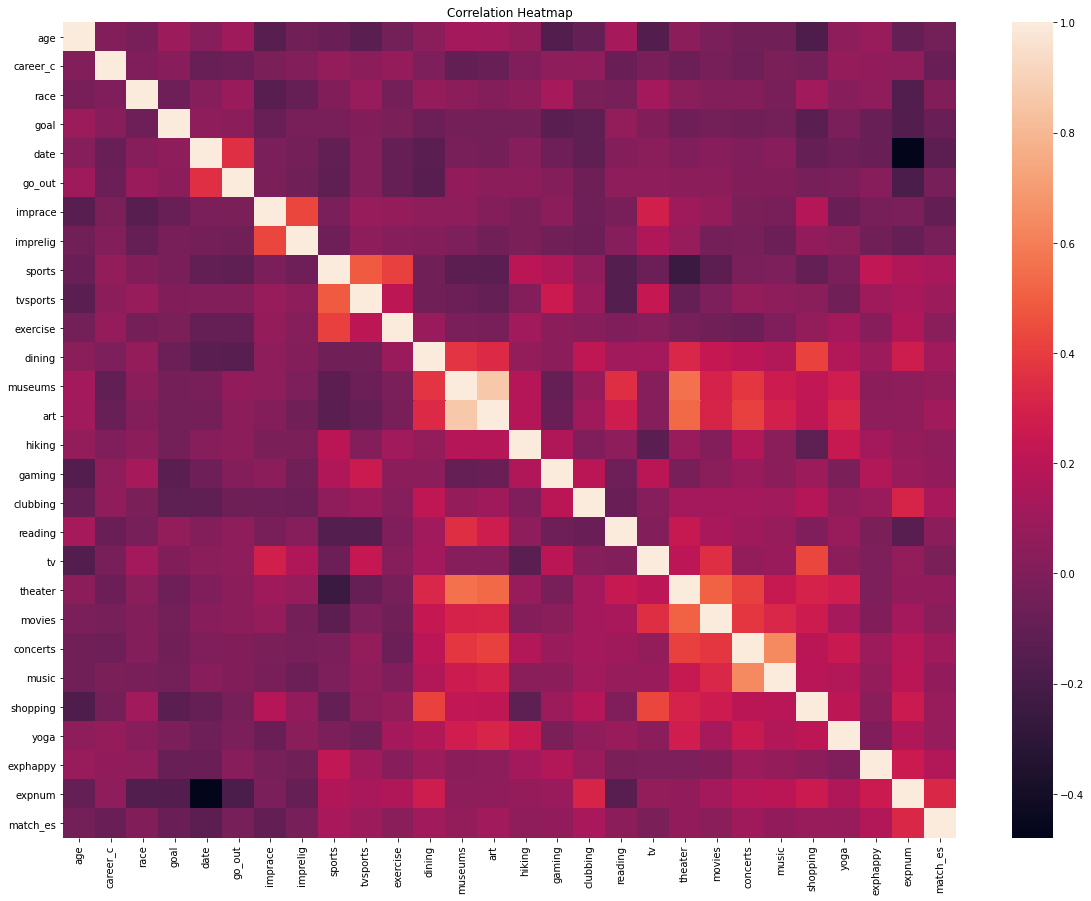

In [17]:
import seaborn as sns # plot library.
import matplotlib.pyplot as plt # plot library
corr = df_people[personal_attr + personal_Q].corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Q17. What does the function corr do?
## Q18. What does it mean to have a correlation close to 1, -1, 0?
## Q19. What can we deduce from this heatmap?
## Q20. Were certain results obvious? if yes which ones and why?

_____

We are now interested in determining which gender is most likely to leave a positive opinion on the opposite gender.
The cell below calculate the rate of positive feedback by gender.

## Q21. Give the expression of the rate of positive feedback and explain it in words

In [18]:
print('Rate of positive feedback on the partner by gender')
df_date[['dec', 'gender']].groupby(['gender']).agg(['count', 'sum', 'mean'])

Rate of positive feedback on the partner by gender


dec                
       count   sum      mean
gender                      
Female  4184  1529  0.365440
Male    4194  1989  0.474249

## Q22. Comment the result, find at least 3 confusing factors, explain why they are confusing and if possible how they impact the results 

In [27]:
print('Rate of positive feedback on the partner by field')
df_date[['dec','dec_o', 'field_cd']].groupby(['field_cd']).agg(["mean", "count"])

Rate of positive feedback on the partner by field


dec           dec_o      
              mean count      mean count
field_cd                                
Arch.     0.200000    10  0.400000    10
Arts      0.315508   187  0.390374   187
Econ      0.412468  1925  0.454545  1925
Educ.     0.453674   626  0.378594   626
Eng.      0.472222   864  0.319444   864
Film      0.539683   126  0.388889   126
Hist.     0.385892   241  0.423237   241
Journ.    0.350769   325  0.424615   325
Lang.     0.400000    40  0.800000    40
Law       0.463158   665  0.436090   665
Math      0.352657   207  0.367150   207
Med. Sc.  0.468531   143  0.650350   143
Nat. Sc.  0.435045   993  0.414904   993
Oth.      0.423077    52  0.519231    52
Pol. Sc.  0.406206   709  0.442877   709
Soc. Sc.  0.448276   696  0.399425   696
Soc. Wr.  0.326923   468  0.408120   468
Und.      0.263158    19  0.421053    19